In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy import stats

%matplotlib inline

In [4]:
muons = pd.read_csv('http://opendata.cern.ch/record/545/files/Dimuon_DoubleMu.csv')

In [5]:
len(muons)

100000

In [6]:
muons.head(10)


,Run,Event,type1,E1,px1,py1,pz1,pt1,eta1,phi1,...,type2,E2,px2,py2,pz2,pt2,eta2,phi2,Q2,M
0,165617,74601703,G,9.6987,-9.5104,0.3662,1.8633,9.5175,0.1945,3.1031,...,G,9.7633,7.3277,-1.1524,6.3473,7.4178,0.7756,-0.1560,1,17.4922
1,165617,75100943,G,6.2039,-4.2666,0.4565,-4.4793,4.2910,-0.9121,3.0350,...,G,9.6690,7.2740,-2.8211,-5.7104,7.8019,-0.6786,-0.3700,1,11.5534
2,165617,75587682,G,19.2892,-4.2121,-0.6516,18.8121,4.2622,2.1905,-2.9881,...,G,9.8244,4.3439,-0.4735,8.7985,4.3697,1.4497,-0.1086,1,9.1636
3,165617,75660978,G,7.0427,-6.3268,-0.2685,3.0802,6.3325,0.4690,-3.0992,...,G,5.5857,4.4748,0.8489,-3.2319,4.5546,-0.6605,0.1875,1,12.4774
4,165617,75947690,G,7.2751,0.1030,-5.5331,-4.7212,5.5340,-0.7736,-1.5522,...,G,7.3181,-0.3988,6.9408,2.2825,6.9523,0.3227,1.6282,1,14.3159
5,165617,74570517,G,14.9422,-9.1744,-10.3203,-5.7079,13.8087,-0.4024,-2.2975,...,T,2.9879,-0.9862,0.3541,-2.7962,1.0479,-1.7080,2.7969,1,6.8270
6,165617,74697773,G,41.9538,-1.4794,-12.4648,40.0319,12.5523,1.8766,-1.6889,...,G,10.1005,1.6238,7.5299,-6.5324,7.7030,-0.7697,1.3584,1,39.5356
7,165617,74704205,G,14.4304,-4.3408,-6.0729,-12.3492,7.4648,-1.2774,-2.1914,...,G,24.7433,9.4061,8.6181,21.2008,12.7572,1.2813,0.7417,-1,37.7372
8,165617,75167029,G,9.7583,2.3903,-3.7824,8.6715,4.4744,1.4156,-1.0072,...,G,13.5684,-3.3975,5.1910,12.0665,6.2039,1.4187,2.1503,1,10.5391
9,165617,75206813,G,10.1623,0.4763,-8.5164,5.5231,8.5297,0.6091,-1.5149,...,G,19.7754,2.7508,-13.9871,13.7059,14.2550,0.8539,-1.3766,1,3.1132


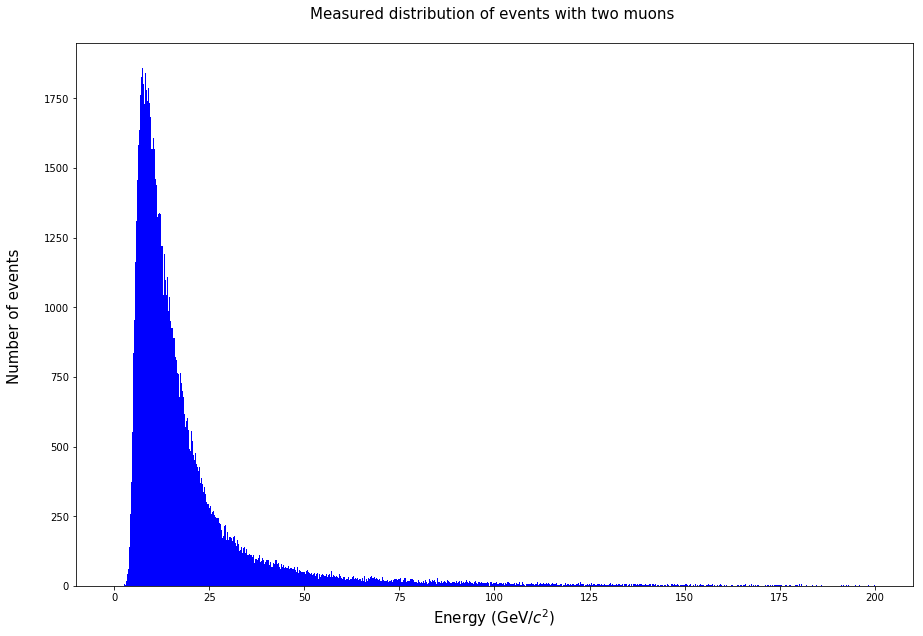

In [7]:
fig = plt.figure(figsize=(15, 10))

plt.hist(muons.E1, 800, range=(0,200), color = 'blue', label = 'Energy 1')

plt.xlabel('Energy (GeV/$c^2$)', fontsize = 15)
plt.ylabel('Number of events \n', fontsize = 15)
plt.title('Measured distribution of events with two muons \n', fontsize = 15)

plt.show()

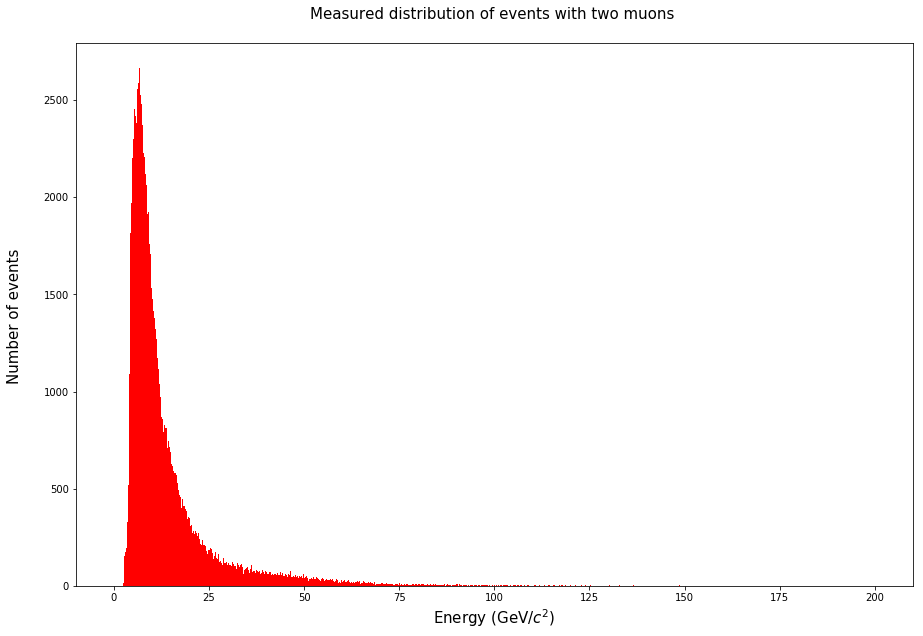

In [8]:
fig = plt.figure(figsize=(15, 10))

plt.hist(muons.E2, 800, range=(0,200), color = 'red', label = 'Energy 2')


plt.xlabel('Energy (GeV/$c^2$)', fontsize = 15)
plt.ylabel('Number of events \n', fontsize = 15)
plt.title('Measured distribution of events with two muons \n', fontsize = 15)

plt.show()

In [11]:
stats.mode(muons.E1)

ModeResult(mode=array([6.2331]), count=array([6]))

In [12]:
invMassSqrd = (muons.E1 + muons.E2)**2 - ((muons.px1 + muons.px2)**2 +(muons.py1 + muons.py2)**2  +(muons.pz1 + muons.pz2)**2)
invMass =np.sqrt(invMassSqrd[(invMassSqrd >0)])

invMass.head()

0    17.492090
1    11.553492
2     9.163692
3    12.477448
4    14.315904
dtype: float64

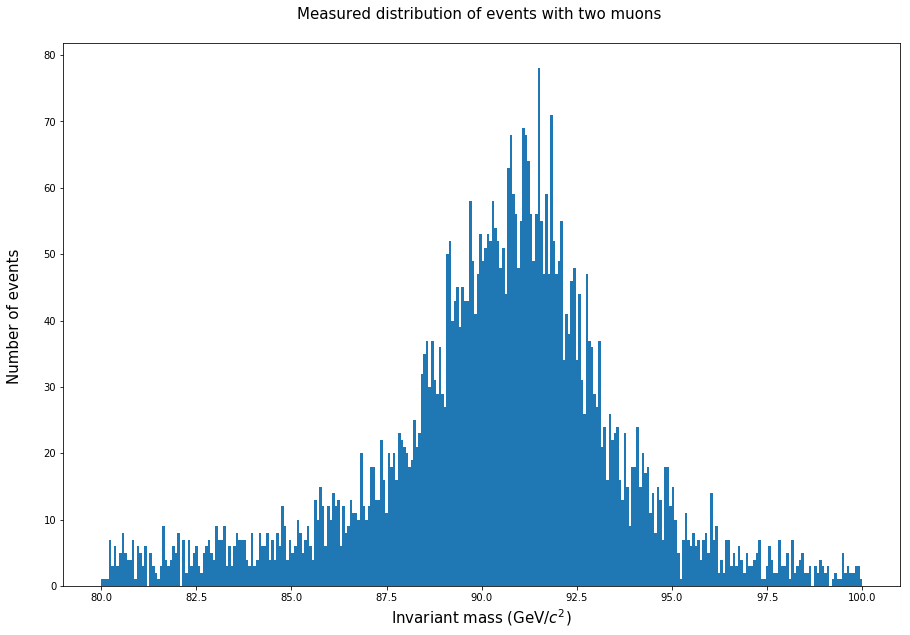

In [13]:
bump = muons[(muons.M >= 80) & (muons.M <= 100)]

fig = plt.figure(figsize=(15, 10))

plt.hist(bump.M, 300, range = (80,100))

plt.xlabel('Invariant mass (GeV/$c^2$)', fontsize = 15)
plt.ylabel('Number of events \n', fontsize = 15)
plt.title('Measured distribution of events with two muons \n', fontsize = 15)

plt.show()

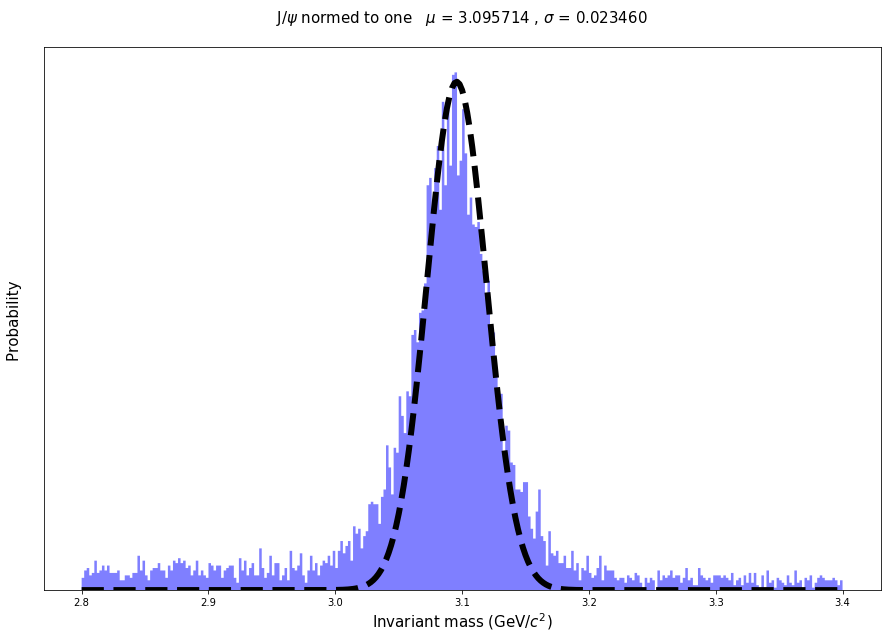

In [14]:
fig = plt.figure(figsize=(15, 10))

lower = 2.8
upper = 3.4

fit_i = 3.05
fit_f = 3.15

jpsi = muons[(muons.M >= lower) & (muons.M <= upper)]
fit = muons[(muons.M >= fit_i) & (muons.M <= fit_f)]

coefficient = len(fit)/len(jpsi)
(mu, sigma) = norm.fit(fit.M)

n, bins, patches = plt.hist(jpsi.M, 300, density = 1, facecolor = 'b', alpha=0.5, histtype='stepfilled',
                            range=(lower, upper))

y = coefficient*norm.pdf( bins, mu, sigma)
l = plt.plot(bins, y, 'k--', linewidth = 6)

plt.xlabel('Invariant mass (GeV/$c^2$)', fontsize = 15)
plt.ylabel('Probability \n', fontsize = 15)
plt.title( 'J/$\psi$ normed to one   $\mu$ = %f , $\sigma$ = %f \n' %(mu,sigma), fontsize=15)

cur_axes = plt.gca()
cur_axes.axes.get_yaxis().set_ticks([])

plt.show()